In [ ]:
import keras as k
import tensorflow as tf
print(k.__version__)
print(tf.__version__)

2.13.1
2.13.0


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
print(df.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [ ]:
x = df
y = pd.Series(cancer.target)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle= True,random_state = 20)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000,random_state = 42)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

acc = accuracy_score(y_pred,y_test)
acc

0.9385964912280702

<Axes: >

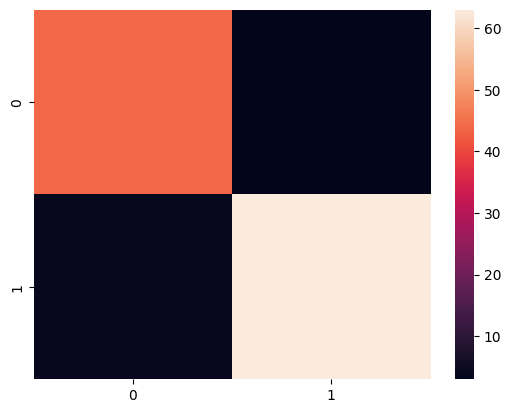

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
conf = confusion_matrix(y_pred,y_test)
sn.heatmap(conf)

In [ ]:
from keras.models import Sequential
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.layers import InputLayer
from keras.layers import Dense
ANN_model = Sequential()
ANN_model.add(InputLayer(input_shape = (30,)))
# ANN_model.add(Dense(10, activation = 'sigmoid'))
#No hidden layers
ANN_model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
ANN_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05)
ANN_model.compile(optimizer = optimizer,loss = 'binary_crossentropy',metrics = ['accuracy'])


In [ ]:
history = ANN_model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
15/15 [==============================] - 1s 3ms/step - loss: 26.1125 - accuracy: 0.5231
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 2.6717 - accuracy: 0.8154
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 1.2011 - accuracy: 0.8703
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 1.5561 - accuracy: 0.8703
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.9283 - accuracy: 0.9011
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8645 - accuracy: 0.9121
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.9231
Epoch 8/10
15/15 [==============================] - 0s 5ms/step - loss: 0.5951 - accuracy: 0.9077
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.8945
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8119 - accuracy: 0.8725


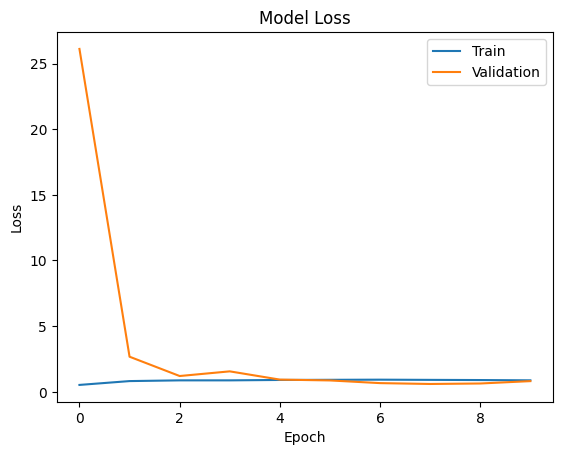

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label = 'Train')
plt.plot(history.history['loss'], label = "Validation")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc= 'upper right')

In [ ]:
test_loss, test_acc = ANN_model.evaluate(x_test,y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

4/4 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.8947
Test loss: 0.445457398891449
Test accuracy: 0.8947368264198303
